In [1]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector

25.2702702703 14.5495495495


<IPython.core.display.Javascript object>


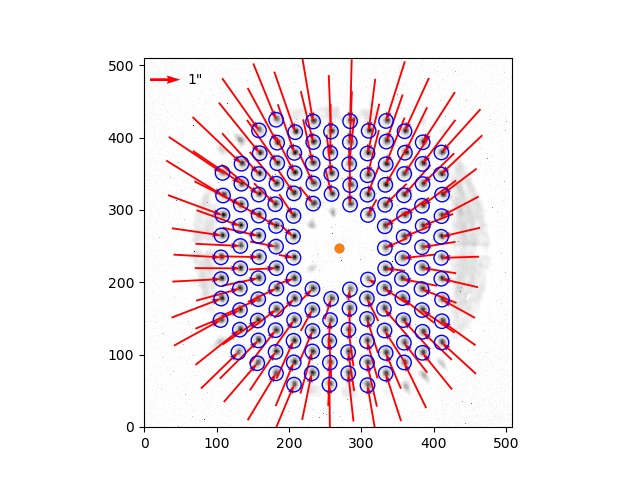

In [65]:
f9wfs = WFSFactory(wfs="f9", nzern=20, back_h=0.999, pup_offset=[0.45, 0.85])
f9wfs.modes['blue']['reference']['xcen'] = 240
f9wfs.modes['blue']['reference']['ycen'] = 259.5
f9wfs.modes['blue']['reference']['pup_outer'] = 225.0
f9_file = "/Users/tim/MMT/wfsdat/20170318/final_tweak_0000.fits"
results = f9wfs.measure_slopes(f9_file, 'blue', plot=True)
plt.show()
# 265 258
# ref 240 259.5

In [66]:
zv, zv_raw = f9wfs.fit_wavefront(results, plot=False)
print(zv)
#plt.show()

1.2634242962882642 arcsec 19914.40657451533 arcsec
[[  7.20263190e-01  -2.27613599e+00   1.51815485e+00   9.30346231e-01
    4.80077936e-01   4.82919901e-01   1.26430148e+00   5.84555416e-01
    3.04493110e-01   3.78352728e-01  -2.03781435e+00   1.00953744e+00
    1.28962504e+00   5.99316188e-01   3.42742238e-01   8.49317325e-02
    3.15868669e-01  -4.65082350e-02   1.29849369e-01   3.19674222e+00
    7.62775028e-01   2.19603527e-01   2.52212937e-01   2.00422235e-01
    2.01041001e-01  -2.77957314e-01   1.56050091e+00   2.14031955e-01
    1.30761922e-02   1.09751353e-01  -4.54761491e-02  -3.46098660e-02
   -4.42863916e-02   2.12836377e-01  -1.20816483e-02  -4.34713248e+00
    5.46752159e-01   3.54208217e+01   3.51310550e-02  -1.88752509e-01
    1.80046101e-01   1.42047636e-01  -4.36601430e-01  -1.16760095e+00
    3.45832926e-01  -1.78054559e-01  -2.00473088e-01   1.04495219e-01
    2.35768464e-01  -5.82377345e-02  -2.91178129e-01   1.49517753e-01
   -4.55037779e-01  -4.14661884e+00  -8

<IPython.core.display.Javascript object>


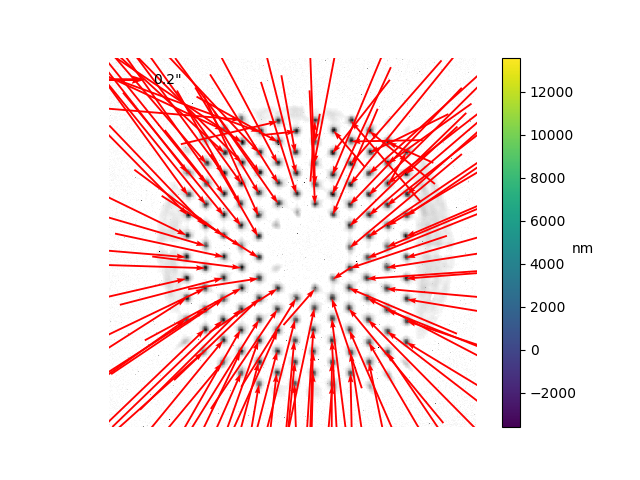

In [26]:
zv_raw.ignore('Z02')
zv_raw.ignore('Z03')
zv_raw.plot_map()
plt.show()

In [ ]:
f5wfs = WFSFactory(wfs="f5", nzern=18, back_h=0.9)
f5_file = "/Users/tim/MMT/wfsdat/20170301/auto_wfs_0004_ave.fits"
results = f5wfs.measure_slopes(f5_file, 'hecto', plot=True)
plt.show()

In [ ]:
zv, zv_raw = f5wfs.fit_wavefront(results)
print(zv)
zv.ignore('Z02')
zv.ignore('Z03')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
mmirs = WFSFactory(wfs="mmirs", nzern=18, back_h=0.9)
mmirs_file = "/Users/tim/MMT/wfsdat/20170110/rawdata/mmirs_wfs_0075.fits"
results = mmirs.measure_slopes(mmirs_file, 'mmirs2', plot=True)
plt.show()

In [ ]:
zv, zv_raw = mmirs.fit_wavefront(results)
print(zv)
zv.ignore('Z02')
zv.ignore('Z03')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
pup = f5wfs.pupil_mask(rotator=0)
plt.imshow(pup)
plt.show()

In [ ]:
im = check_wfsdata(f5_file)
back = background(im, h=0.9)
plt.imshow(im-back, origin='lower')
plt.show()

In [ ]:
subt = im - back
fits.writeto("blah.fits", subt, overwrite=True)

In [ ]:
cen = center_pupil(subt, pup, plot=True)
print(cen)
plt.show()

In [ ]:
mmirs.modes['mmirs2']['reference']['xspacing']

In [ ]:
results['xcen'], results['ycen']

In [ ]:
f5wfs.modes['hecto']['reference']

In [ ]:
f9wfs.tiltfactor

In [ ]:
mmirs.modes['mmirs2']['reference']

In [ ]:
f5wfs.modes['hecto']['reference']

In [ ]:
f9wfs.modes['blue']['reference']

In [ ]:
f9wfs.modes['blue']['reference']['apertures']['xcentroid']

In [ ]:
s = np.load("svd.npz")['arr_0']

#plt.plot(s.cumsum()/s.sum())
plt.plot(s)
plt.show()

In [ ]:
s_sq = s**2
fk = s_sq/s_sq.sum()
e = -(1./np.log(len(s))) * np.sum(fk * np.log(fk))

In [ ]:
nvec = np.argwhere(fk.cumsum() >= e)[0][0]

In [ ]:
nvec

In [60]:
sasize = [27, 27]
slopes = (np.indices(sasize, dtype=float)/(np.r_[sasize].reshape(-1, 1, 1))).reshape(-1, 2)
slopes = np.vstack([slopes, np.ones(slopes.shape[1])]).transpose()
slopes = np.vstack([slopes, np.ones(slopes.shape[1])])

In [61]:
slopes

array([[ 0.        ,  0.        ,  0.        , ...,  0.85185185,
         0.92592593,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.88888889,
         0.96296296,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [62]:
slopes_inv = np.linalg.pinv(slopes)

In [63]:
print(slopes_inv.transpose())

[[-0.00418825 -0.00418825 -0.00418825 ...,  0.00062441  0.00126781
   0.00449761]
 [-0.00418825 -0.00418825 -0.00418825 ...,  0.00611892  0.00676232
   0.00449761]
 [ 0.00540895  0.00540895  0.00540895 ..., -0.00188172 -0.0025022
  -0.00296756]]


In [44]:
np.hstack?